In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:49<00:00, 19.4MB/s]
100% 1.06G/1.06G [00:49<00:00, 23.0MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

In [5]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(150,150,3)
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [6]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [7]:
conv_base.trainable = False

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [10]:
batch_size = 32

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/train',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        '/content/test',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [11]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 179s 272ms/step - accuracy: 0.8269 - loss: 0.4040 - val_accuracy: 0.9120 - val_loss: 0.2213
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 172s 274ms/step - accuracy: 0.8953 - loss: 0.2428 - val_accuracy: 0.9134 - val_loss: 0.2039
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 167s 267ms/step - accuracy: 0.9068 - loss: 0.2217 - val_accuracy: 0.9094 - val_loss: 0.2053
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 165s 264ms/step - accuracy: 0.9101 - loss: 0.2045 - val_accuracy: 0.9150 - val_loss: 0.1987
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 165s 264ms/step - accuracy: 0.9179 - loss: 0.1997 - val_accuracy: 0.9114 - val_loss: 0.2038
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 165s 264ms/step - accuracy: 0.9203 - loss: 0.1910 - val_accuracy: 0.9194 - val_loss: 0.1951
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 170s 273ms/step - accuracy: 0.9234 - loss: 0.1818 - val_accuracy: 0.9120 - val_loss: 0.2085
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 166s 266ms/step - accuracy: 0.9280 -

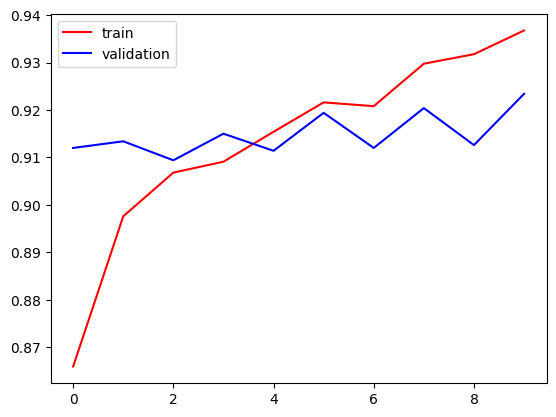

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

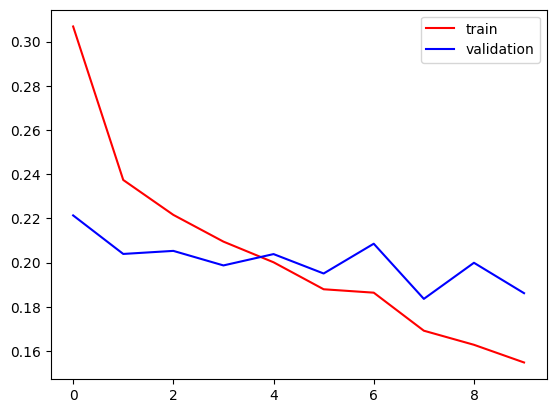

In [15]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()